This is Homework 3, the advanced data science project.

The link to the advanced tutorial is [here](https://www.kdnuggets.com/2019/11/customer-segmentation-using-k-means-clustering.html).



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


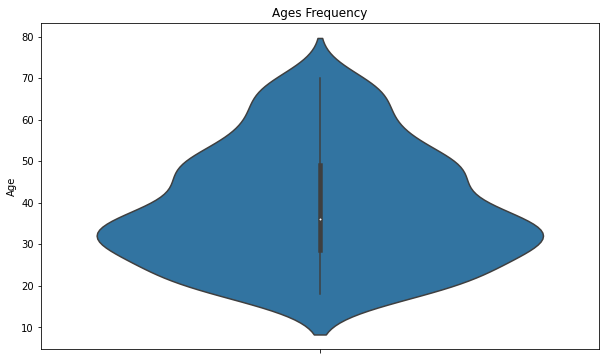

We see that most of the customers in our data (not of our business as some customers may have not opted to make a membership card
-- this is a point i noticed from the meaningful visualization part of this homework) are in their early thirties 


In [ ]:
# we import required libraries for plotting, data preprocessing, etc...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we get the data and print out 5 example customer information from it
df = pd.read_csv("/content/Mall_Customers.csv")
print(df.head())

# the customer id column is not relevant / would not correlate with the other column values 
# so we will not use it in our model, so we drop it

df.drop(["CustomerID"], axis = 1, inplace=True)

# we plot the age frequencies in our data
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

print("We see that most of the customers in our data (not of our business as some customers may have not opted to make a membership card\n-- this is a point i noticed from the meaningful visualization part of this homework) are in their early thirties ")

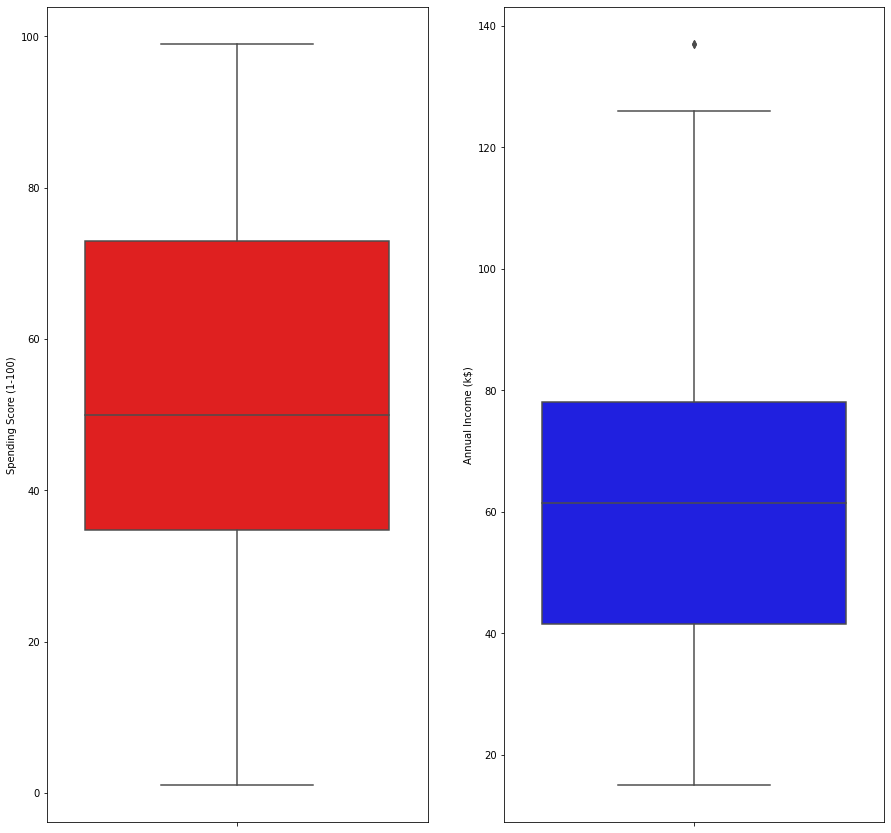

In [ ]:
# we want to see how wide or narrow the range of annual income and spending pattern is. so we make two boxplots for each

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"], color="blue")
plt.show()



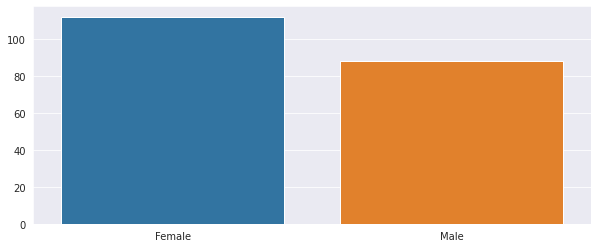

In [ ]:
# bar graph to show the number of female customers compared to the number of male customers in our data

genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

print("We see that there are more registered female customers in our data than registered mal customers")

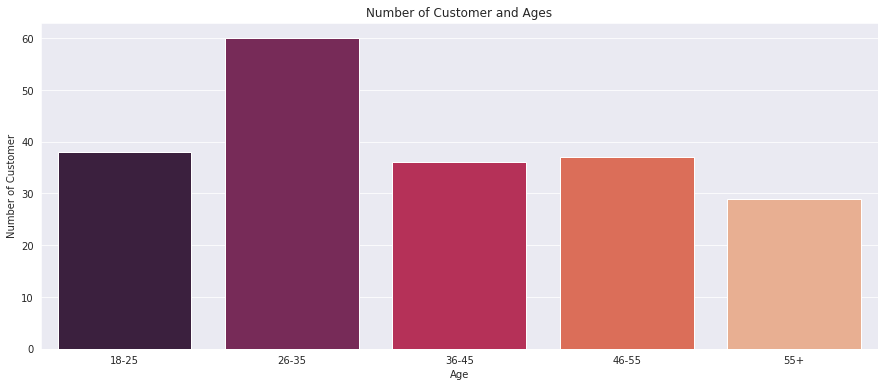

In [ ]:
# next we want to plot the age groups with their count to figure out the age group with the largest number of registered customers
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

print("We see that most of our registered customers in the the 26 - 35 age group")

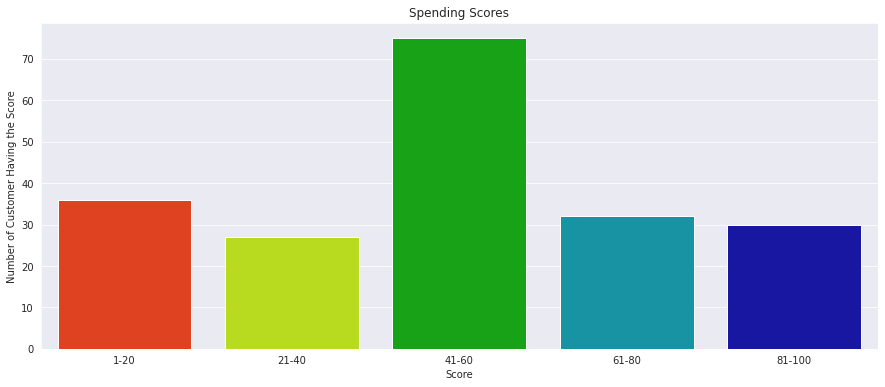

We find that the most registered customers are in the 41-60 spending score range compared to the other ranges. 


In [ ]:
# here we are plotting thecount of spending scores in different spending score ranges to see which range is the most common amongst register customers
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

print("We find that the most registered customers are in the 41-60 spending score range compared to the other ranges. ")

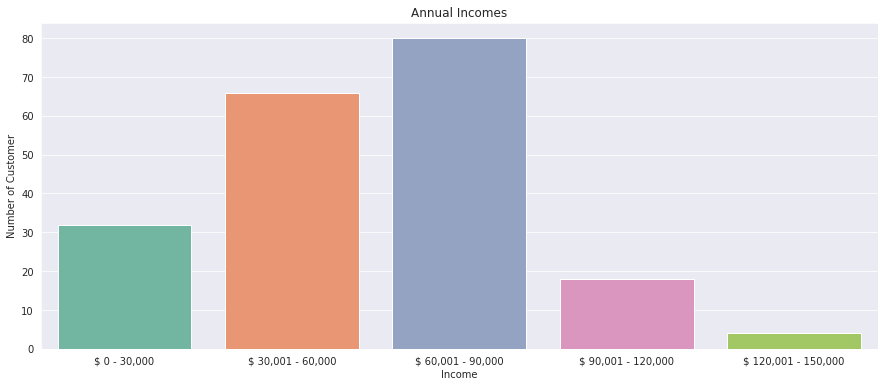

In [ ]:
# similar to the previous graphs, here we plot the various anual income ranges of our customers against each's count
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

print("We find that most of our registered customers have an income between $ 60,0001 - $90,000 compared to the other ranges")

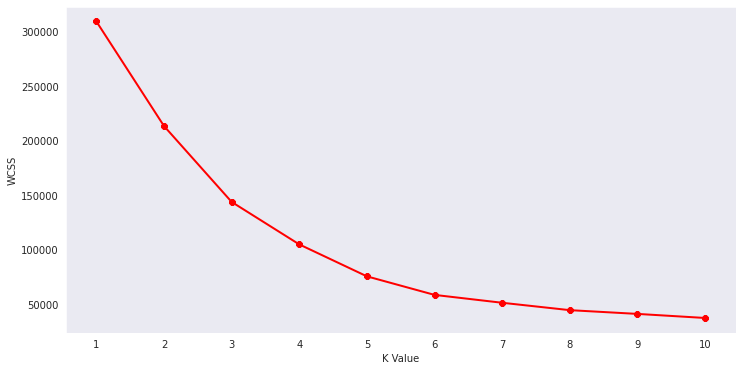

The elbow on the elbow curve occurs at approximately k = 5, so s=5 is likely the optimal value
for the number of clusters which we should use to train our KMeans model.


In [ ]:
# Here we start training our model

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11): # trains a kmeans model on a range of cluster sizes to determine best cluster size through elbow curve plotting
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:]) # df.iloc[:,1:] removes the gender column - this may affect accuracy
    wcss.append(kmeans.inertia_)

# plots the elbow curve
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

print("The elbow on the elbow curve occurs at approximately k = 5, so s=5 is likely the optimal value\nfor the number of clusters which we should use to train our KMeans model.")

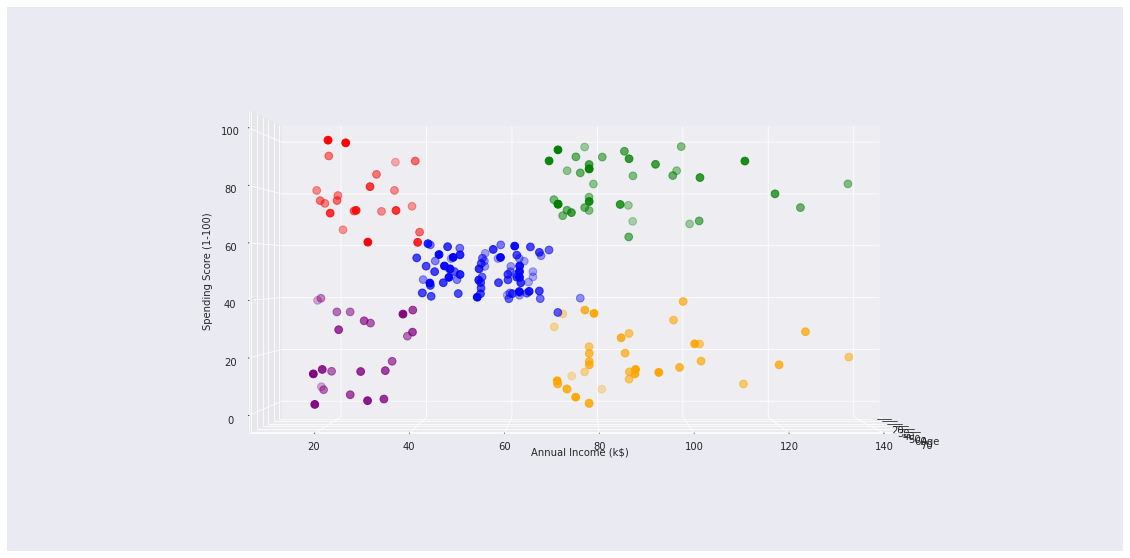

In [ ]:
# we create our kmeans model, fit it on our data, and predict the labels of our data points
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

# we import libraries required to make a 3d plot of our data
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
 # we create a 3d plot and use different colors for each cluster to distinctly show each of the 5 clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(0, 0)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

An insight that i can see from this data is that 

*   The top left cluster of customers are the young, 'teenage' ones whom want to buy alot (and thus have a high spending score) despite having a relatively low income 

*   The bottom left cluster is the old customers who spend few to mediocre amount of money as they have low income

The same technique can be used to classify the other three clusters. For example the middle cluster represents the average person (of all ages) who gets a medium annual income and spends in a mediocre manner 
